**Author**: Petru Potrimba <br>
**Matriculation**:  928850

# Visual Inspection of Motorcycle Connecting Rods

### Utility function

In [2]:
def handle_touching_rods(imgf):
    img, contours, hierarchy = cv.findContours(imgf.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # get the contour index of touching rods
    # TODO: handle multiple touching rods using list
    sepc = -1
    for i in range(len(contours)):
        if(len(contours[i])) >= 256: # there are touching elements
            sepc = i
            break

    collision_points = []
    
    if sepc != -1: # if there are touching rods, add them
        for i in range(len(contours[sepc])):
            if (contours[sepc][i][0][0] - 1 >= 0) and (contours[sepc][i][0][1] - 1 >= 0) and (contours[sepc][i][0][0] + 1 <= 255) and (contours[sepc][i][0][1] + 1 <= 255):
                octet = int(img[contours[sepc][i][0][1] - 1, contours[sepc][i][0][0]]) + int(img[contours[sepc][i][0][1] - 1, contours[sepc][i][0][0] - 1]) + int(img[contours[sepc][i][0][1], contours[sepc][i][0][0] - 1]) + int(img[contours[sepc][i][0][1] + 1, contours[sepc][i][0][0] - 1]) + int(img[contours[sepc][i][0][1] + 1, contours[sepc][i][0][0]]) + int(img[contours[sepc][i][0][1] + 1, contours[sepc][i][0][0] + 1]) + int(img[contours[sepc][i][0][1], contours[sepc][i][0][0] + 1]) + int(img[contours[sepc][i][0][1] - 1, contours[sepc][i][0][0] + 1])
                if octet == 255 or octet == 510:
                    collision_points.append([contours[sepc][i], False])

    if len(collision_points) > 0:
        # calculate euclidean distance
        for i in range(len(collision_points) - 1):
            distance_from_i_to_j = math.inf
            index_of_j = -1
            if collision_points[i][1] == False: # means that still need to find its miniumum distance point
                for j in range(i + 1, len(collision_points)):
                    dst = distance.euclidean(collision_points[i][0][0], collision_points[j][0][0])
                    if dst < distance_from_i_to_j and collision_points[j][1] == False:
                        distance_from_i_to_j = dst
                        index_of_j = j
                # draw line
                cv.line(img,(collision_points[i][0][0][0],collision_points[i][0][0][1]),(collision_points[index_of_j][0][0][0],collision_points[index_of_j][0][0][1]),(255,0, 0),1)
                collision_points[i][1] = True
                collision_points[index_of_j][1] = True
    return img

### Original mage

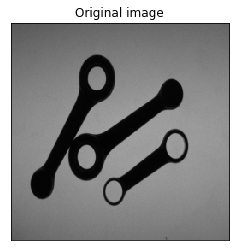

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math

plt.figure(figsize=(4,4))

original_img = cv.imread('testImages/TESI50.BMP', 0)
img = original_img.copy()
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.show()

### Apply Otsu's tresholding

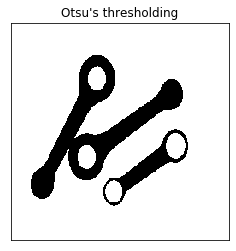

In [4]:
ret, otsu_img = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(otsu_img,cmap = 'gray')
plt.title('Otsu\'s thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

### Handling touching rods

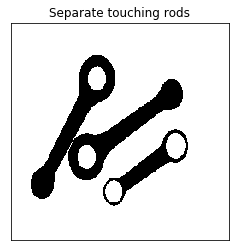

In [5]:
separate_rods_img = handle_touching_rods(otsu_img)
plt.imshow(separate_rods_img,cmap = 'gray')
plt.title('Separate touching rods'), plt.xticks([]), plt.yticks([])
plt.show()

### Labeling rods type

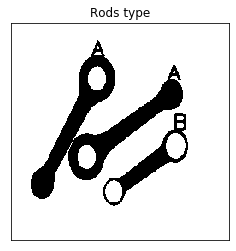

In [6]:
img, contours, hierarchy = cv.findContours(separate_rods_img.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] == 0 and hierarchy[0, i][2] != -1 and len(contours[i]) >= 72:
        if len(hierarchy[:, np.where(hierarchy[0][:, 3] == i)][0][0]) == 1:
            img = cv.putText(img, 'A', (contours[i][0][0][0], contours[i][0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv.LINE_4)
            plt.imshow(img,cmap = 'gray')
            plt.title('Rods type'), plt.xticks([]), plt.yticks([])
        elif len(hierarchy[:, np.where(hierarchy[0][:, 3] == i)][0][0]) > 1:
            img = cv.putText(img, 'B', (contours[i][0][0][0], contours[i][0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv.LINE_4)
            plt.imshow(img,cmap = 'gray')
            plt.title('Rods type'), plt.xticks([]), plt.yticks([])
            
plt.show()

### Position, orientation, length, width and width at the barycenter Wb 

Position:  (157.82928466796875, 171.53659057617188) , Orientation:  -38.65980911254883
Length:  121.50318908691406 , Width:  37.16935729980469 , Width at the barycenter(Wb):  32.139381408691406
------------------------------------------------------------------------------------------------
Position:  (131.1572265625, 120.00112915039062) , Orientation:  -40.502845764160156
Length:  164.0031280517578 , Width:  51.43611526489258 , Width at the barycenter(Wb):  47.40918731689453
------------------------------------------------------------------------------------------------
Position:  (73.72096252441406, 124.44819641113281) , Orientation:  -65.79072570800781
Length:  183.9803466796875 , Width:  46.140018463134766 , Width at the barycenter(Wb):  37.75584411621094
------------------------------------------------------------------------------------------------


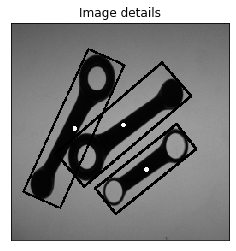

In [7]:
img = original_img.copy()
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] == 0 and hierarchy[0, i][2] != -1 and len(contours[i]) >= 72:
        rect = cv.minAreaRect(contours[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        img = cv.drawContours(img,[box],0,(0, 255, 0), 2)
        (x, y),(MA, ma),angle = cv.fitEllipse(contours[i])
        print("Position: ", rect[0], ", Orientation: ", rect[2])
        print("Length: ", rect[1][0] if rect[1][0] > rect[1][1] else rect[1][1], ", Width: ", 
              rect[1][1] if rect[1][1] < rect[1][0] else rect[1][0], ", Width at the barycenter(Wb): ", MA)
        print("------------------------------------------------------------------------------------------------")
        # draw barycenter
        img = cv.circle(img, center=(round(rect[0][0]), round(rect[0][1])), radius=1, color=(255, 0, 0) , thickness=2) 
        plt.imshow(img, cmap = 'gray')
        plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()

### For each hole, position of the centre and diameter size

Centre position:  (119.5, 197.5)
Diameter:  19.296567916870117
------------------------------------------------------------------------------------------------
Centre position:  (192.0, 144.5)
Diameter:  21.727323532104492
------------------------------------------------------------------------------------------------
Centre position:  (88.0, 157.5)
Diameter:  20.599206924438477
------------------------------------------------------------------------------------------------
Centre position:  (100.0, 65.5)
Diameter:  20.42827606201172
------------------------------------------------------------------------------------------------


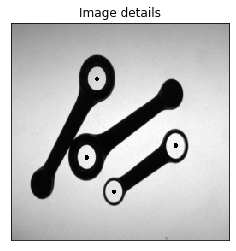

In [8]:
img = original_img.copy()
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] > 0 and len(contours[i]) > 24 and len(contours[hierarchy[0, i][3]]) >= 72: # if the parent of the hole has a perimeter greater than 72 (basically here I am verifying whether the hole's parent is a rod)
        rect = cv.minAreaRect(contours[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        (x, y),(MA, ma),angle = cv.fitEllipse(contours[i])
        print("Centre position: ", rect[0])
        print("Diameter: ", MA)
        print("------------------------------------------------------------------------------------------------")
        # draw barycenter
        img = cv.circle(img, center=(round(rect[0][0]), round(rect[0][1])), radius=1, color=(0, 255, 0) , thickness=2) 
        plt.imshow(img, cmap = 'gray')
        plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()

# Project report

## First Task

### Type of rod (A or B)

In order to understand whether a rod has one hole (type A) or two holes (type B), the idea was to use the OpenCV function `findContours` which returns a hierarchical matrix that specifies for each contour the information regarding what is the **next** contour at its same level, the **previous** contour at its same level, who is its **first child** and who is its **parent**.

Using these information it will be easy to classify whether a rod is of type A or B.

But, in order to apply that function, we need a binary image, so the first thing to do is a **segmentation** of the image. <br>
The segmentation algorithm I decided to use is the **Otsu's segmentation** since it effectively calculate an automatic threshold even though the images have been taken by a different lighting power.

Once done that, I used the information returned by *findContours* to classify the rods.

### Position and orientation (modulo $\pi$)

max noise contour == 12

min non noise contour == 35

threshold = (12 + 35) / 2 -> 24

-------

hierarchy[0, i][3] == 0 : if my parent is zero, it means that I'am a rod. <br>
hierarchy[0, i][2] != -1 : if a rod has a first child, it means it is a rod and not a bolt, so it will be analyzed. <br>
len(contours[i]) >= 72 : of the perimeter of the blob took into account is greater than the empirical value 72, it means that it is a rod an not a washers, so it will be analyzed.

------

max area rondella == 64

min area biella == 80

threshold = (64 + 80) / 2 -> 72

------

max area biella == 256

min area touching bielle == 397

threshold for touching elements: (256 + 397) / 2 -> 326